## Lecture 2 - Linear and Polynomial Regression

### Guidelines for model implementation (Mandatory)

1. Implement a class **RegressionModelNormalEquation** that implements the abstract
class **MachineLearningModel**. All methods should be implemented and properly documented.
This class must work for polynomials of any degree (i.e., an input parameter that
must be captured in the class constructor).

2. Implement a class **RegressionModelGradientDescent** that implements the abstract
class **MachineLearningModel**. All methods should be implemented and properly documented.
This class must work for polynomials of any degree and receive other parameters
such as the learning rate and number of iterations.

3. Both implementations should be vectorized. When implementing these classes, your
vector β should start with all values as 0. In implementing the fit() method, ensure
you track how the cost function evolved over the number of iterations (i.e., store it in an
array you can retrieve after the model is built). This will be needed later in the assignment.

### Validation of your model implementation (1-4 Mandatory, 5-6 Non-mandatory)

1. **(Mandatory)** In this part, you will use a reduced version of the Boston Housing Dataset (housingboston.csv). We will use the first two input variables as the features in this part of the assignment. The last variable is the value to predict.
* **INDUS:** proportion of nonretail business acres per town.
* **RM:** average number of rooms per dwelling.
* **MEDV:** Median value of owner-occupied homes in $1,000s.

Read the dataset and store the values as vectors in the variables $X_e$ and $y$. For this part of the assignment, the degree of the polynomial for your models must be 1.

In [2]:
import numpy as np

data = np.genfromtxt('datasets\housing-boston.csv', delimiter=',', dtype=None, encoding='utf-8', skip_header=1)
X_e = np.array(data[:, :2], dtype=float)
y = np.array(data[:, 2], dtype=float)
degree = 1

2. **(Mandatory)** Plot the dataset. You must plot two figures side by side (e g., use the subplot method), with the predicted value as the $y-axis$ and each variable on the $x-axis$. 

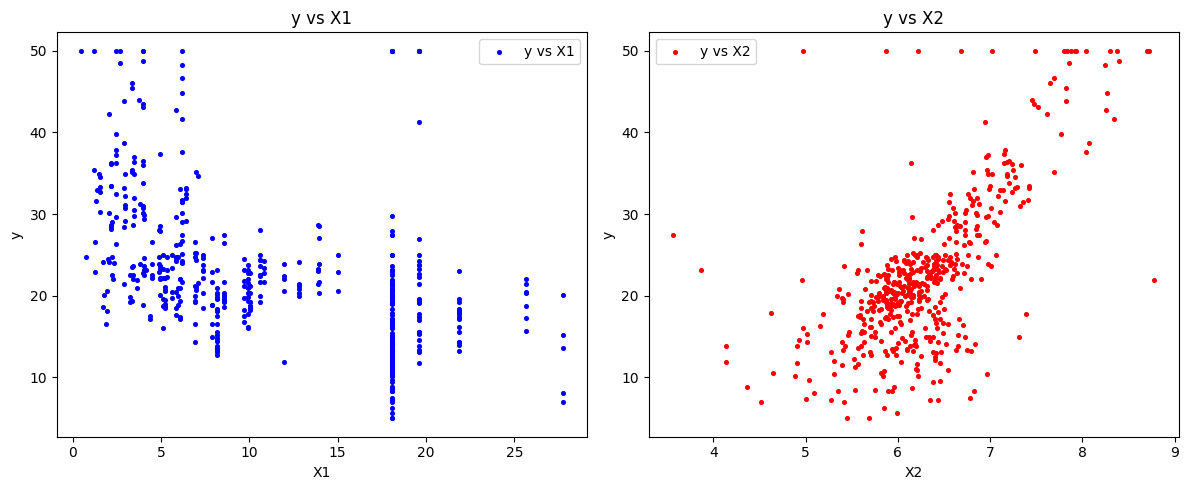

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_e[:, 0], y, color='blue', label='y vs X1', s=7)
plt.xlabel('X1')
plt.ylabel('y')
plt.title('y vs X1')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_e[:, 1], y, color='red', label='y vs X2', s=7)
plt.xlabel('X2')
plt.ylabel('y')
plt.title('y vs X2')
plt.legend()
plt.tight_layout()
plt.show()


3. **(Mandatory)** Use your implementation of the regression model with the normal equation (RegressionModelNormalEquation) and report:

* The values for $\beta$. 

* The cost.

* The predicted value for an instance with values for INDUS and TAX equals to $,$, respectively.


In [4]:
import MachineLearningModel as mlm

model = mlm.RegressionModelNormalEquation(degree)

model.fit(X_e, y)

indus = 2.31
rm = 6.575
X_test = np.array([[indus, rm]])

y_pred = model.predict(X_test)

print(f"Beta: {model.beta}")
print(f"Costs: {model.costs})")

print(f"Predicted y: {y_pred}")

Beta: [-22.89831573  -0.33471389   7.82205511]
Costs: 39.1454832114651)
Predicted y: [27.75850755]


4. **(Mandatory)** Now, normalize the input features, run the regression model with the normal equation, and report the same items. 
The predicted values for this experiment should be the same, but the $\beta$ values change. Why?

---

When we normalize the data all the features come to have the same scale with mean 0 and standard deviation 1. The $\beta$ values need to change to keep the predictions the same as they were without the normalization. The original model looked like y = β₀ + β₁X₁ + β₂X₂ but with normalization it looks like y = β₀' + β₁'((X₁-μ₁)/σ₁) + β₂'((X₂-μ₂)/σ₂) so to keep the prediction the same we need to have the following relationship between the $\beta$ values:

- β₀ = β₀' - (β₁'μ₁/σ₁) 
- β₁ = β₁'/σ₁
- β₂ = β₂'/σ₂

Hence the change in $\beta$ values 

In [5]:
X_mean = np.mean(X_e, axis=0)
X_std = np.std(X_e, axis=0)
X_norm = (X_e - X_mean) / X_std

indus_norm = (indus - X_mean[0]) / X_std[0]
rm_norm = (rm - X_mean[1]) / X_std[1]
X_test_norm = np.array([[indus_norm, rm_norm]])

model_norm = mlm.RegressionModelNormalEquation(degree)
model_norm.fit(X_norm, y)

y_pred_norm = model_norm.predict(X_test_norm)

print(f"Beta: {model_norm.beta}")
print(f"Costs: {model_norm.costs})")
print(f"Predicted y (normalized): {y_pred_norm}")

Beta: [22.53280632 -2.29398525  5.49047659]
Costs: 39.1454832114651)
Predicted y (normalized): [27.75850755]


5. **(Non-Mandatory)** Now, you will work with your implementation of the gradient descent for any degree polynomial. In this part, you must compare how the cost function evolves by using your model using a non-normalized and a normalized instance of your RegressionModelGradientDescen class. 
    * You must plot two figures (e.g., use subplots) side by side to show how the cost evolves over 3000 iterations with a learning rate of $0.001$ using and not using feature normalization. 
    * Describe what is happening and why this happens (i.e., using or not normalization).        
    
---
    
The plot with non-normalized features has an extremely sharp initial descent, and then immediate plateau. The plot with the normalized feature has a smoother and more gradual descent before stabilazing. Both start with the same cose, and eventuallly reach the same value.

Without normalization features with different scales create an imbalance, large scale features dominate the gradient direction. The algorithm takes inconsistent steps, overshooting in some dimensions, while barely moving in others. This creates the sharp drop we see in the plot.

With normalization all the features contribute more equally to parameter updates. Gradient descent follows a more direct path toward the minimum. Updates occur at a more consistent rate across all parameters.



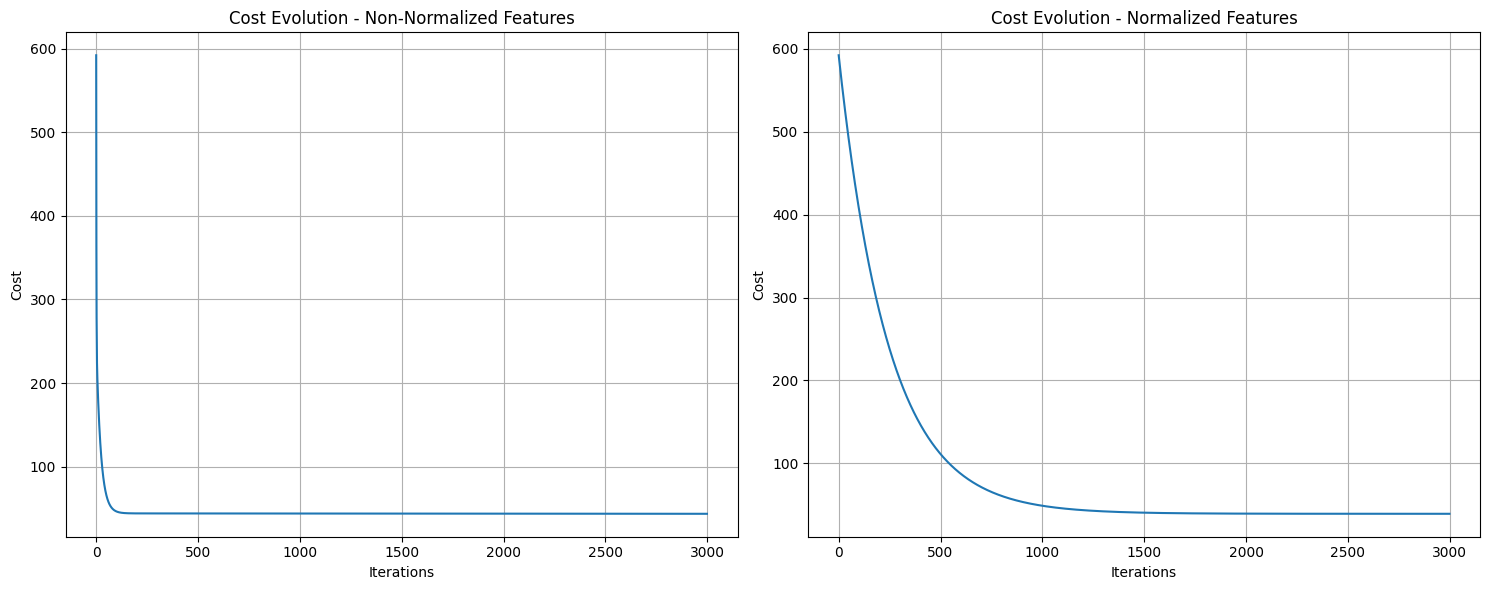

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import MachineLearningModel as mlm

learning_rate = 0.001
num_iterations = 3000

data = np.genfromtxt('datasets/housing-boston.csv', delimiter=',', dtype=None, encoding='utf-8', skip_header=1)
X_e = np.array(data[:, :2], dtype=float)
y = np.array(data[:, 2], dtype=float)
degree = 1

model = mlm.RegressionModelGradientDescent(degree=degree, learning_rate=learning_rate, num_iterations=num_iterations)
model_norm = mlm.RegressionModelGradientDescent(degree=degree, learning_rate=learning_rate, num_iterations=num_iterations)

X_mean = np.mean(X_e, axis=0)
X_std = np.std(X_e, axis=0)
X_norm = (X_e - X_mean) / X_std

model.fit(X_e, y)
model_norm.fit(X_norm, y)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(model.costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Evolution - Non-Normalized Features')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(model_norm.costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Evolution - Normalized Features')
plt.grid(True)

plt.tight_layout()
plt.show()

6. **(Non-Mandatory)** Finally, find and plot a figure with the hyperparameter's learning rate and the number of iterations (using the normalized version) such that you get within a difference of 1\% of the final cost for the normal equation using this dataset.
---
The normal equation solution achieves a cost of approximately 39.145483 (optimal)
Learning rate significantly impacts convergence speed:
- $\alpha$ = 0.001: Requires 1817 iterations to reach within 1% of optimal cost
- $\alpha$ = 0.005: Requires 362 iterations
- $\alpha$ = 0.01: Requires 181 iterations
- $\alpha$ = 0.05: Requires just 35 iterations
- $\alpha$ = 0.1: Requires only 17 iterations


The first plot shows a clear inverse relationship between learning rate and required iterations. As the learning rate increases, the number of iterations needed to converge drops dramatically, approximately halving with each doubling of the learning rate.

The second plot displays the cost evolution during training. Higher learning rates produce steeper initial descents, reaching the 1% threshold zone much faster. The cost curves for all learning rates eventually converge to similar values near the normal equation solution.

With normalized features, larger step sizes can safely accelerate convergence by 100x compared to very small learning rates.

For this dataset and model, a learning rate of 0.05-0.1 offers optimal efficiency, achieving good results.

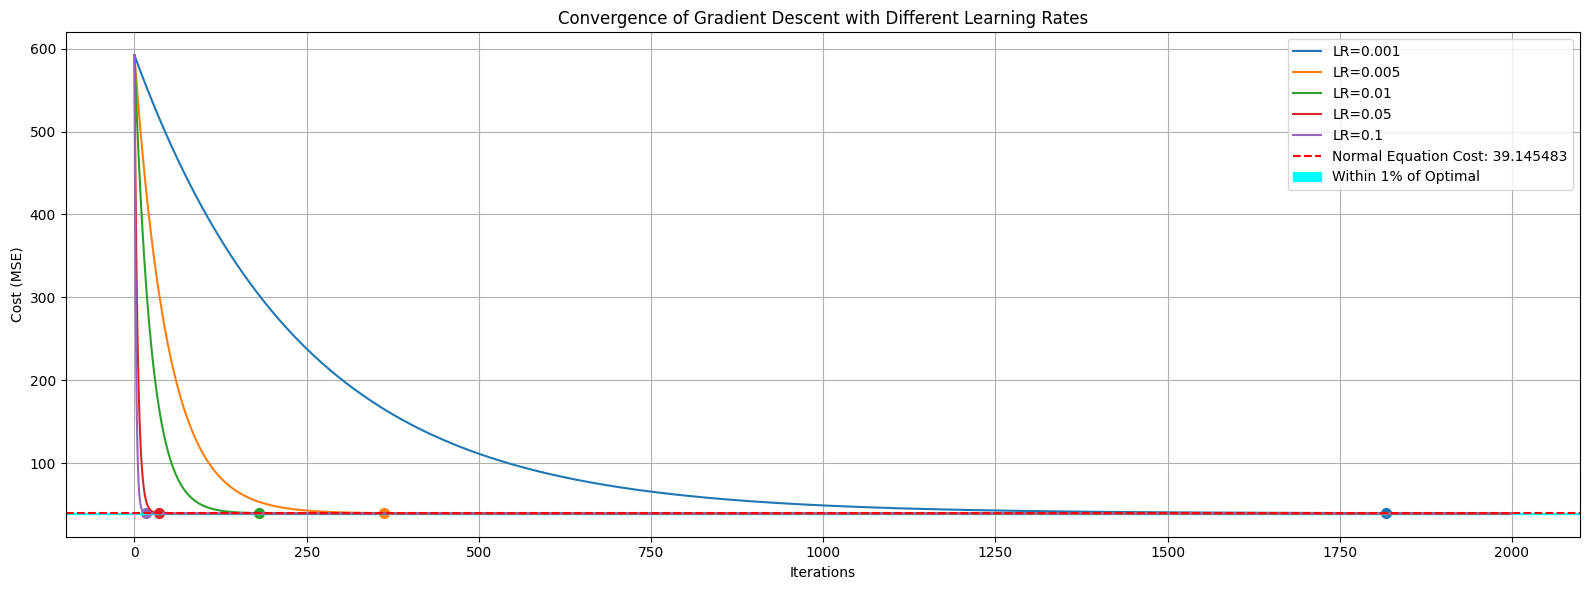

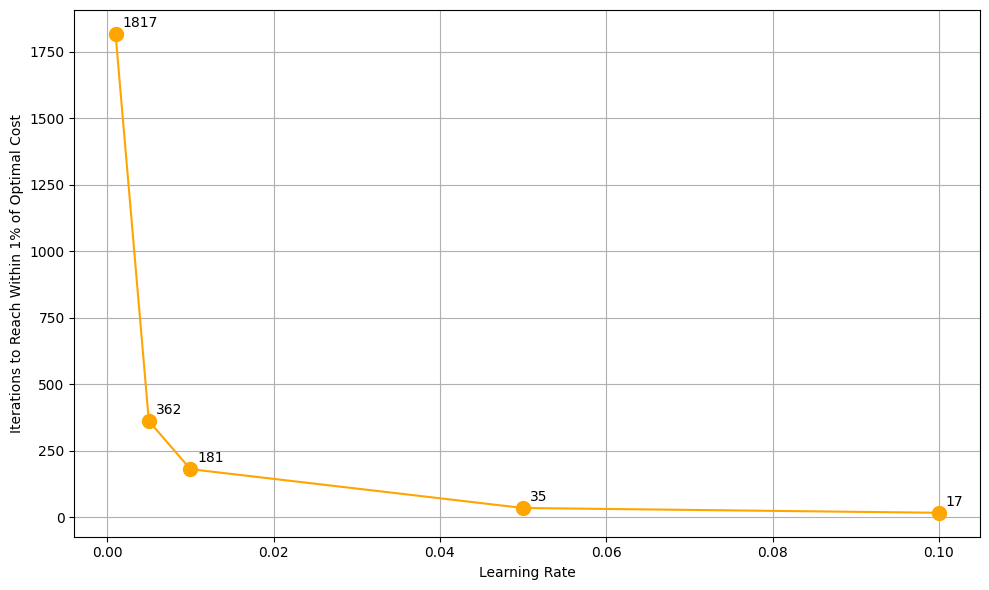

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import MachineLearningModel as mlm

data = np.genfromtxt('datasets/housing-boston.csv', delimiter=',', dtype=None, encoding='utf-8', skip_header=1)
X_e = np.array(data[:, :2], dtype=float)
y = np.array(data[:, 2], dtype=float)
degree = 1

X_mean = np.mean(X_e, axis=0)
X_std = np.std(X_e, axis=0)
X_norm = (X_e - X_mean) / X_std


model_normal = mlm.RegressionModelNormalEquation(degree)
model_normal.fit(X_norm, y)
reference_cost = model_normal.costs

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
max_iterations = 2000

plt.figure(figsize=(16,6))

convergence_data = []

for lr in learning_rates:

    model = mlm.RegressionModelGradientDescent(degree=1, learning_rate=lr, num_iterations=max_iterations)
    model.fit(X_norm, y)
   
    plt.plot(range(len(model.costs)), model.costs, label=f'LR={lr}')
    
    costs_array = np.array(model.costs)
    threshold_indices = np.where(abs(costs_array - reference_cost) / reference_cost <= 0.01)[0]
    
    if len(threshold_indices) > 0:
        first_convergence = threshold_indices[0]
        plt.scatter(first_convergence, model.costs[first_convergence], marker='o', s=50)
        
    
        convergence_data.append({
            'learning_rate': lr,
            'iterations': first_convergence,
            'cost': model.costs[first_convergence]
        })
        
plt.axhline(y=reference_cost, color='r', linestyle='--', label=f'Normal Equation Cost: {reference_cost:.6f}')
plt.axhspan(reference_cost * 0.99, reference_cost * 1.01, alpha=1, color='cyan', label='Within 1% of Optimal')

plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Convergence of Gradient Descent with Different Learning Rates')
plt.legend()
plt.grid(True) 
plt.tight_layout()
plt.show()

if convergence_data:
    plt.figure(figsize=(10, 6))
    
    lr_values = [cfg['learning_rate'] for cfg in convergence_data]
    iter_values = [cfg['iterations'] for cfg in convergence_data]
    
    plt.scatter(lr_values, iter_values, s=100, color='orange')
    
    plt.plot(lr_values, iter_values, color='orange')
    
    for lr, iters in zip(lr_values, iter_values):
        plt.annotate(f"{iters}", (lr, iters), xytext=(5, 5), textcoords='offset points')
    
    plt.xlabel('Learning Rate')
    plt.ylabel('Iterations to Reach Within 1% of Optimal Cost')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Lecture 2 - Testing your Multivariate Regression Model (1-2 Mandatory, 3 Non-mandatory)

In this exercise, we will use the file secret_polynomial.csv. The data consists of 400 x, y points generated from a polynomial with some Gaussian noise added.

1. **(Mandatory)** Start by creating a procedure to split the dataset into training and test sets. The proportion must be 80% for training and 20% for testing. Show your procedure working by plotting a figure with 3 subplots. The first plot must be the dataset with all data. The second must be the training set and the third the test set. 


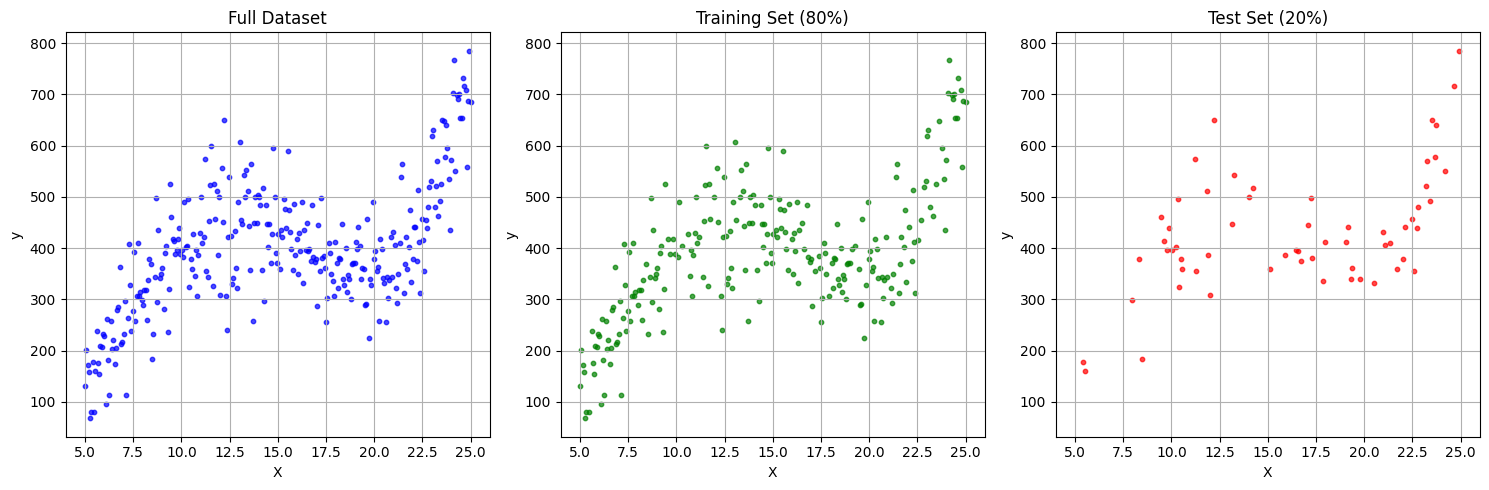

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import MachineLearningModel as mlm

seed = 865
np.random.seed(seed)

data = np.genfromtxt('datasets/secret_polynomial.csv', delimiter=',', dtype=None, encoding='utf-8', skip_header=1)
X = np.array(data[:, 0], dtype=float)
y = np.array(data[:, 1], dtype=float)

indices = np.random.permutation(len(X))
split_point = int(0.8 * len(X))
    
    
X_train_indices = indices[:split_point]
X_test_indices = indices[split_point:]
    
X_train = X[X_train_indices]
X_test = X[X_test_indices]
y_train = y[X_train_indices]
y_test = y[X_test_indices]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X, y, color='blue', s=10, alpha=0.7)
axes[0].set_title('Full Dataset')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].grid(True)

x_min, x_max = axes[0].get_xlim()
y_min, y_max = axes[0].get_ylim()

axes[1].scatter(X_train, y_train, color='green', s=10, alpha=0.7)
axes[1].set_title('Training Set (80%)')
axes[1].set_xlabel('X')
axes[1].set_ylabel('y')
axes[1].grid(True)

axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)


axes[2].scatter(X_test, y_test, color='red', s=10, alpha=0.7)
axes[2].set_title('Test Set (20%)')
axes[2].set_xlabel('X')
axes[2].set_ylabel('y')
axes[2].grid(True)

axes[2].set_xlim(x_min, x_max)
axes[2].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

2. **(Mandatory)** Now fit and plot (e.g., using subplots) all polynomial models for degrees $d\in [1,6]$. Observe your figure and decide which degree gives the best fit. Motivate your answer.

---
- Degree 1: The straight line fails to capture the underlying pattern in the data. It shows a basic upward trend but misses the clear non-linear characteristics.

- Degree 2: Still too simplistic to adequately represent the data pattern, it's slightly curved but doesn't match the variations in the data.

- Degree 3: This model begins to capture the essential non-linear pattern, showing the rise at low x values, a more level middle section, and another rise at high x values.

- Degree 4: Significantly better fit than lower degrees. It accurately captures the initial rise around x=5-10, the flatter region between x=10-20, the dip around x=20, and the final sharp rise at x>22.

- Degree 5: Very similar to degree 4, with minor improvements in some regions.

- Degree 6: Nearly identical to degree 5 visually.

Degree 4 appears to provide the best balance for this dataset. It effectively captures the major patterns in the data without introducing unnecessary complexity. While the higher-degree polynomials (5-6) might fit the training data slightly better, the marginal improvement doesn't justify the added complexity. Degree 4 captures the essential structure of the data while maintaining model simplicity.

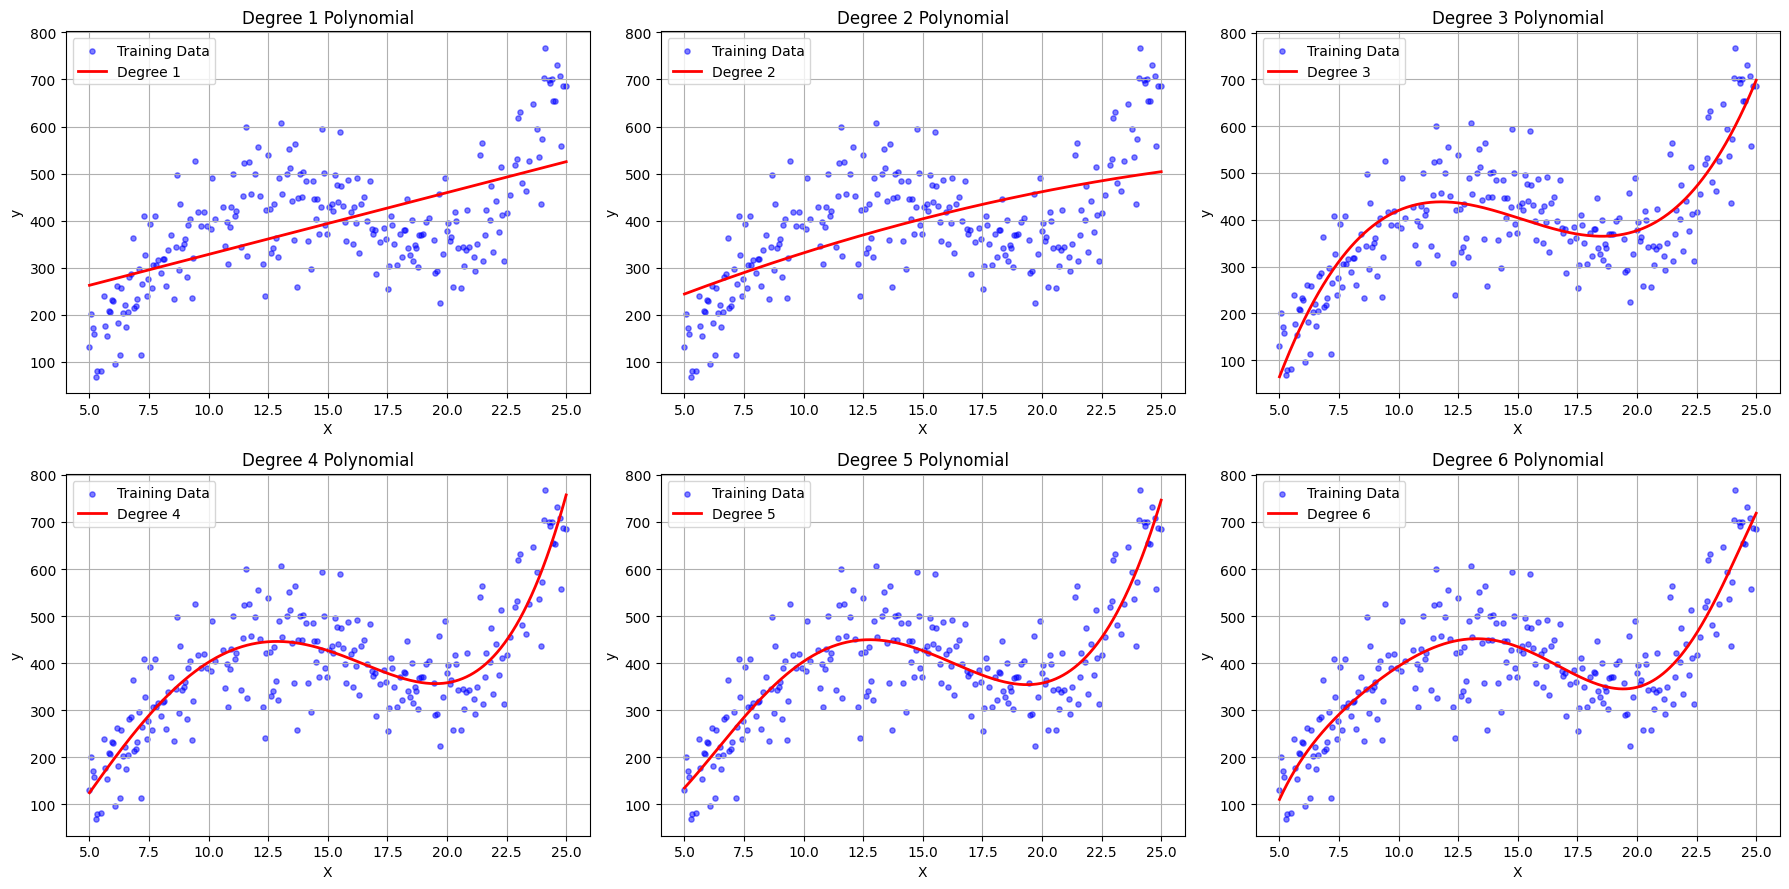

In [9]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_train_norm = (X_train - X_mean) / X_std
X_test_norm = (X_test - X_mean) / X_std
X_norm = (X - X_mean) / X_std


degrees = range(1,7)

plt.figure(figsize=(18, 9))

X_curve = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
X_curve_norm = (X_curve - X_mean) / X_std

for i, degree in enumerate(degrees):
    
    model = mlm.RegressionModelNormalEquation(degree)
    model.fit(X_train_norm, y_train)
    
    plt.subplot(2, 3, i+1)
    
    plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data', s=14)

    y_pred = model.predict(X_curve_norm)

    plt.plot(X_curve, y_pred, color='red', linewidth=2, label=f'Degree {degree}')
    
    plt.title(f'Degree {degree} Polynomial')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


3. **(Non-Mandatory)** To increase the confidence of your answer, you must divide the data into training and test sets and make repeated runs with shuffled data (at least 20 runs). You must decide on the best way to make this decision. By using this approach, what is your decision and why? 
---
Degrees 1 and 2 exhibit very poor performance with:
- High median test MSE values (~11,000)
- Wide error distributions
- Multiple outliers
- Clear evidence of underfitting

Degree 3 shows a dramatic improvement:
- MSE drops to around 5,000-5,500
- More consistent performance across runs
- Still higher error than higher-degree models

Degree 4 demonstrates the best overall performance:
- Lowest median test MSE (~4,700)
- Relatively tight distribution indicating stability across different data splits
- No outliers in the distribution

Degrees 5 and 6 show comparable performance to degree 4:
- Similar median values to degree 4
- Slightly wider distributions
- No significant improvement over degree 4

Degree 4 provides the optimal model for this dataset based on multiple evaluation runs. The boxplot clearly shows that increasing polynomial complexity beyond degree 4 provides no systematic improvement in test performance.

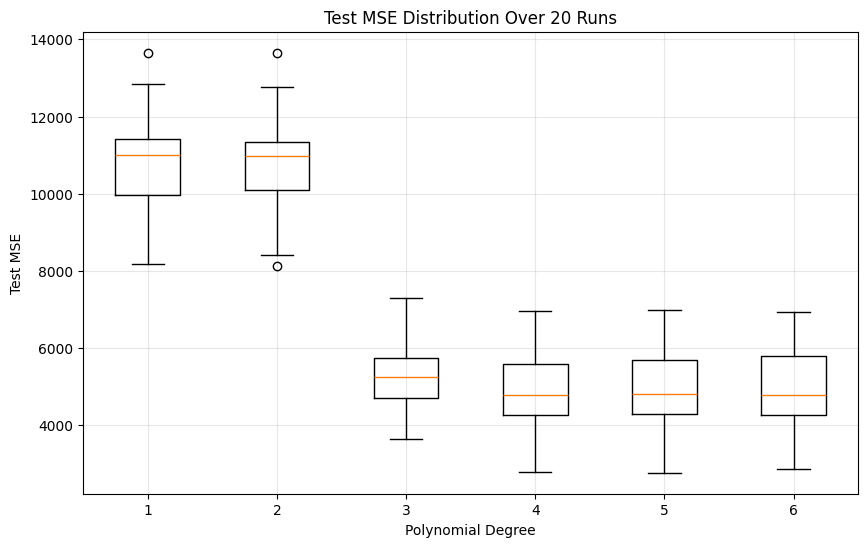

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import MachineLearningModel as mlm

seed = 865

runs = 20
degrees = range(1, 7)

data = np.genfromtxt('datasets/secret_polynomial.csv', delimiter=',', dtype=None, encoding='utf-8', skip_header=1)
X = np.array(data[:, 0], dtype=float)
y = np.array(data[:, 1], dtype=float)

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

X_curve = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
X_curve_norm = (X_curve - X_mean) / X_std

all_test_mse = np.zeros((runs, len(degrees)))

for run in range(runs):
    np.random.seed(seed + run)
    indices = np.random.permutation(len(X))
    X_norm = X_norm[indices]
    y = y[indices]

    X_train = X_norm[:int(0.8 * len(X))]
    X_test = X_norm[int(0.8 * len(X)):]
    y_train = y[:int(0.8 * len(y))]
    y_test = y[int(0.8 * len(y)):]

    for i, degree in enumerate(degrees):
        model = mlm.RegressionModelNormalEquation(degree)
        model.fit(X_train, y_train)
        test_mse = model.evaluate(X_test, y_test)
        all_test_mse[run, i] = test_mse


avg_mse = np.mean(all_test_mse, axis=0)
std_mse = np.std(all_test_mse, axis=0)

plt.figure(figsize=(10, 6))
plt.boxplot([all_test_mse[:, i] for i in range(len(degrees))])
plt.xlabel('Polynomial Degree')
plt.ylabel('Test MSE')
plt.title('Test MSE Distribution Over 20 Runs')
plt.xticks(range(1, len(degrees) + 1), degrees)
plt.grid(True, alpha=0.3)
plt.show()

## Lecture 3 - Logistic Regression

### Guidelines for model implementation (Mandatory)

1. Implement a class LogisticRegressionModel that implements the abstract class MachineLearningModel.
All methods should be implemented and properly documented.
This class receives parameters such as the learning rate and number of iterations. This
class should be implemented in a way that works for two classes only (i.e., 0 or 1).

2. Implement a class NonLinearLogisticRegressionModel that implements the abstract
class MachineLearningModel. All methods should be implemented and properly documented.
This class must work for polynomials of any degree and receive other parameters
such as the learning rate and number of iterations. This class should work for only two
input variables (e.g., X1 and X2, as discussed in class). This class should be implemented
in a way that works for two classes only (i.e., 0 or 1).

3. Both implementations should be vectorized. When implementing these classes, your vector
β should start with all values as 0. In your implementation of the evaluate function, ensure
you keep track of how the cost function evolved over the number of iterations. This will
be needed later in the assignment.

4. Remember that log(0) = undefined. Therefore, you may add a term epsilon = 1e-15 to
prevent this in using the np.log() function. Simply add this term inside the function, and
you will avoid such errors.

### Using your Implementations for the LogisticRegressionModel and the NonLinearLogisticRegressionModel (1-3 Mandatory, 4-6 Non-mandatory)

You will now try to classify bank notes as fake (0) or not (1). This dataset banknote_authentication.csv contains 1372 observations and has 2 features and (in column 3) binary labels of either fake (0) or not (1). Feature data were extracted using a Wavelet Transform tool from images of both fake and non-fake banknotes.

1. **(Mandatory)** Read and normalize the data. Plot the 2 variables in the x and y-axis. Use different colors to plot the classes (i.e., 0 or 1). You should plot two series to obtain this figure.  

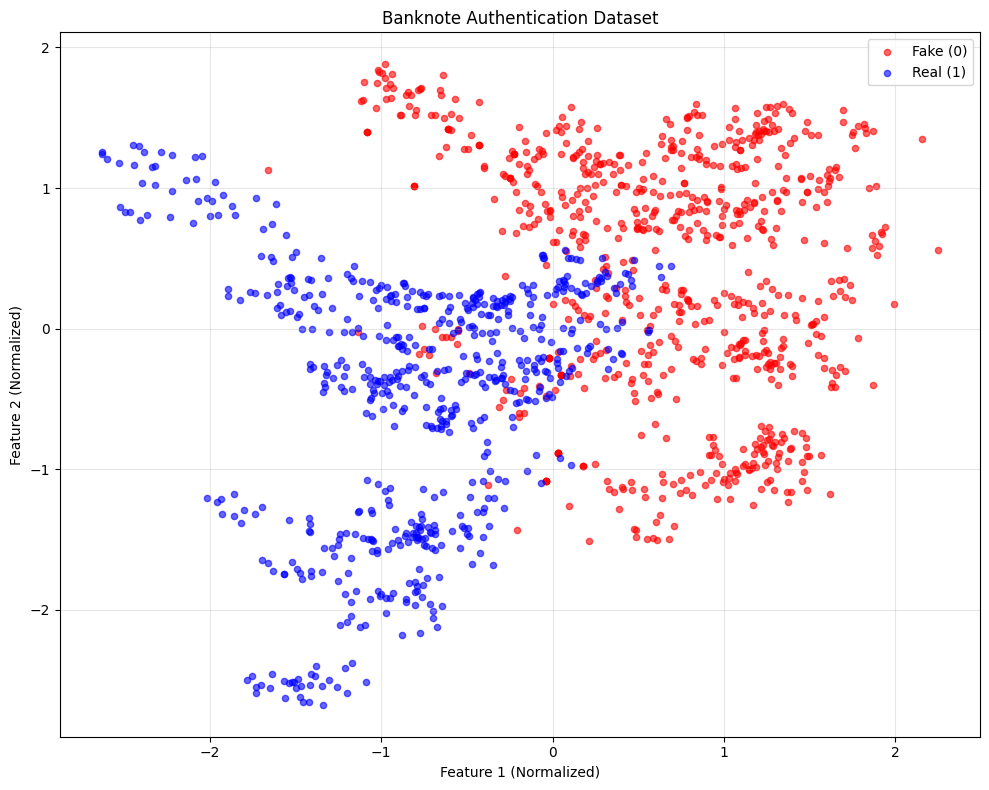

In [11]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('datasets/banknote_authentication.csv', delimiter=',', dtype=float, encoding='utf-8')
X = np.array(data[:, :2], dtype=float)
y = np.array(data[:, 2], dtype=float)

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

fake = X_norm[y == 0]
real = X_norm[y == 1]

plt.figure(figsize=(10, 8))
plt.scatter(fake[:, 0], fake[:, 1], color='red', label='Fake (0)', alpha=0.6, s=20)
plt.scatter(real[:, 0], real[:, 1], color='blue', label='Real (1)', alpha=0.6, s=20)
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.title('Banknote Authentication Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


2. **(Mandatory)** Separate a validation set with 20\% of the data. We will call the remaining 80\% a sub-dataset.

In [12]:
seed = 865
np.random.seed(seed)

indices = np.random.permutation(len(X))
split_point = int(0.8 * len(X))
    
    
X_train_indices = indices[:split_point]
X_test_indices = indices[split_point:]
    
X_train = X_norm[X_train_indices]
X_test = X_norm[X_test_indices]
y_train = y[X_train_indices]
y_test = y[X_test_indices]


3. **(Mandatory)** Your task now is to decide on a learning rate and the number of iterations that would work well for your implementations of the LogisticRegression and your NonLinearLogisticRegression. The degree for the NonLinearLogisticRegression model must be 2. Create a figure for each model showing the learning rate and number of iterations and plot the cost function $J(\beta)$ as a function over iterations. This approach must use the sub-dataset (the 80\%) from step 2. Discuss your choice for an appropriate learning rate and the number of iterations.
---

From the learning rate plots (both for LogisticRegression and NonLinearLogisticRegression):

- Low learning rates (0.001, 0.005): Convergence is extremely slow. At LR=0.001, the cost is still at ~0.56 after 1000 iterations, far from optimal.

- Medium learning rates (0.01, 0.05): Better convergence, but still requires many iterations to reach minimum cost.

- Higher learning rates (0.1, 0.5):

    - LR=0.1 shows an excellent balance of convergence speed and stability, reaching close to minimum cost within ~300 iterations.
    - LR=0.5 converges very rapidly (within ~100 iterations) but has a steeper initial drop that might risk overshooting in some scenarios


LR=0.1 seems to be the best choice for the learning rate both for the linear model and the non linear model

Based on this learning rate, we can look at the iterration plots

From the iteration plots (both for LogisticRegression and NonLinearLogisticRegression):

- 100 iterations: Insufficient for convergence with most learning rates.
- 500 iterations: Nearly converged but still showing slight improvements.
- 1000 iterations: Shows good convergence with minimal improvement thereafter.
- 2000-5000 iterations: No significant improvement over 1000 iterations.


For both Linear and Non-Linear Logistic Regression (degree=2):

- Optimal Learning Rate: 0.1

    - Provides fast convergence without instability
    - Reaches near-optimal cost within reasonable iterations
    - Shows consistent behavior across both models
- Optimal Number of Iterations: 1000

    - Ensures complete convergence while avoiding unnecessary computation
    - The cost function stabilizes well by this point
   

In [13]:
import MachineLearningModel as mlm

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
iterations = 1000


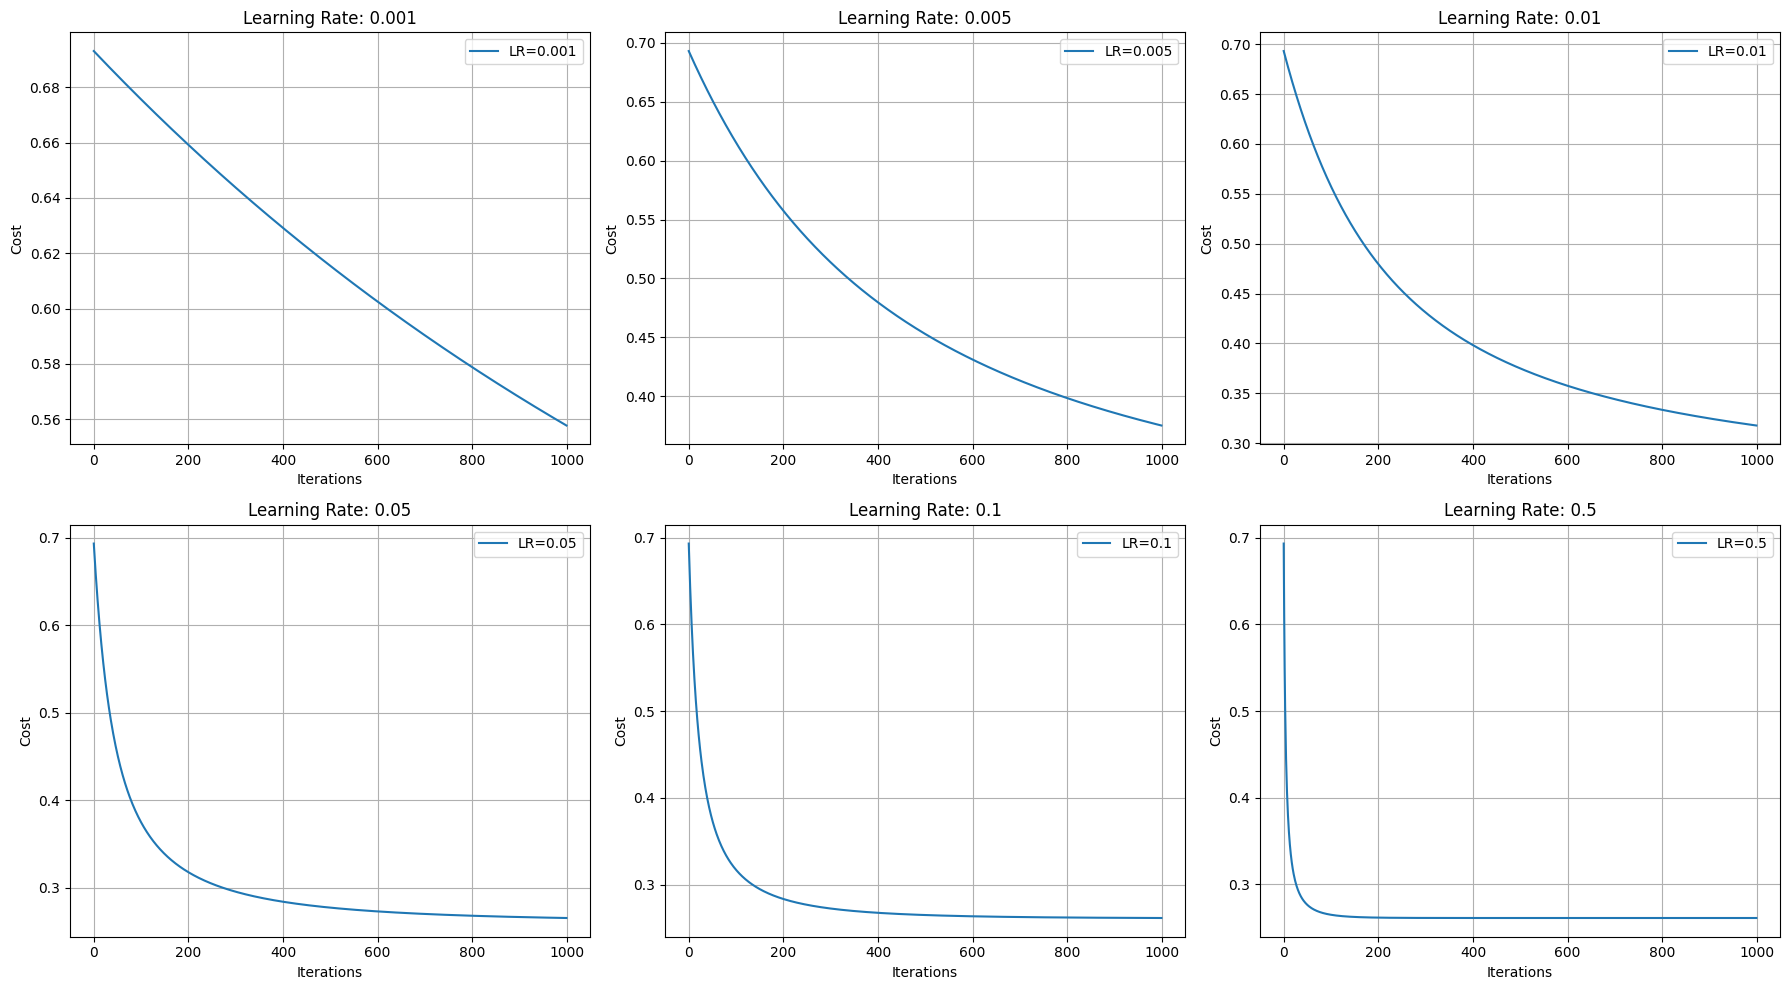

In [14]:
plt.figure(figsize=(18, 10))

for i, lr in enumerate(learning_rates):
    model_logreg = mlm.LogisticRegression(learning_rate=lr, num_iterations=iterations)
    model_logreg.fit(X_train, y_train)

    plt.subplot(2, 3, i + 1)
    plt.plot(range(iterations), model_logreg.costs, label=f'LR={lr}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Learning Rate: {lr}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

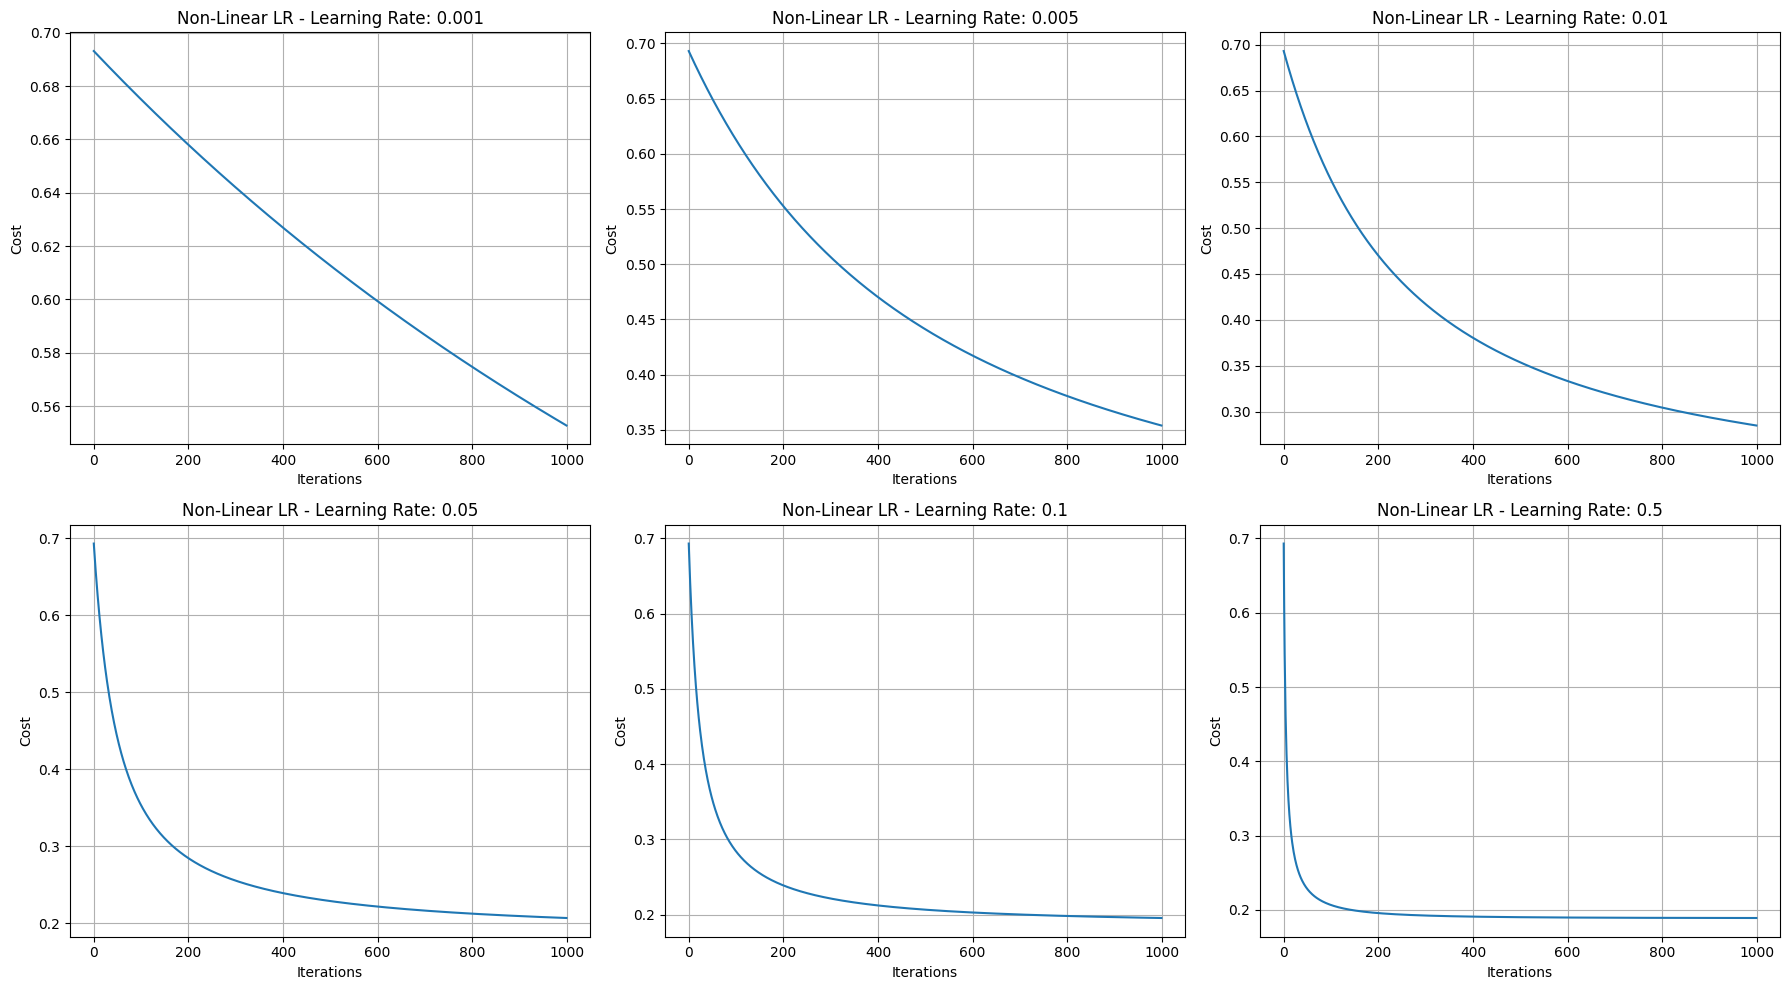

In [15]:
plt.figure(figsize=(18, 10))

for i, lr in enumerate(learning_rates):
    model_nlinreg = mlm.NonLinearLogisticRegression(degree=2, learning_rate=lr, num_iterations=iterations)
    model_nlinreg.fit(X_train, y_train)
    
    plt.subplot(2, 3, i+1)
    plt.plot(range(len(model_nlinreg.costs)), model_nlinreg.costs)
    plt.title(f'Non-Linear LR - Learning Rate: {lr}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [16]:
best_lr_lin = 0.1
best_lr_nonlin = 0.1

iteration_counts = [100, 500, 1000, 2000, 4000, 5000]

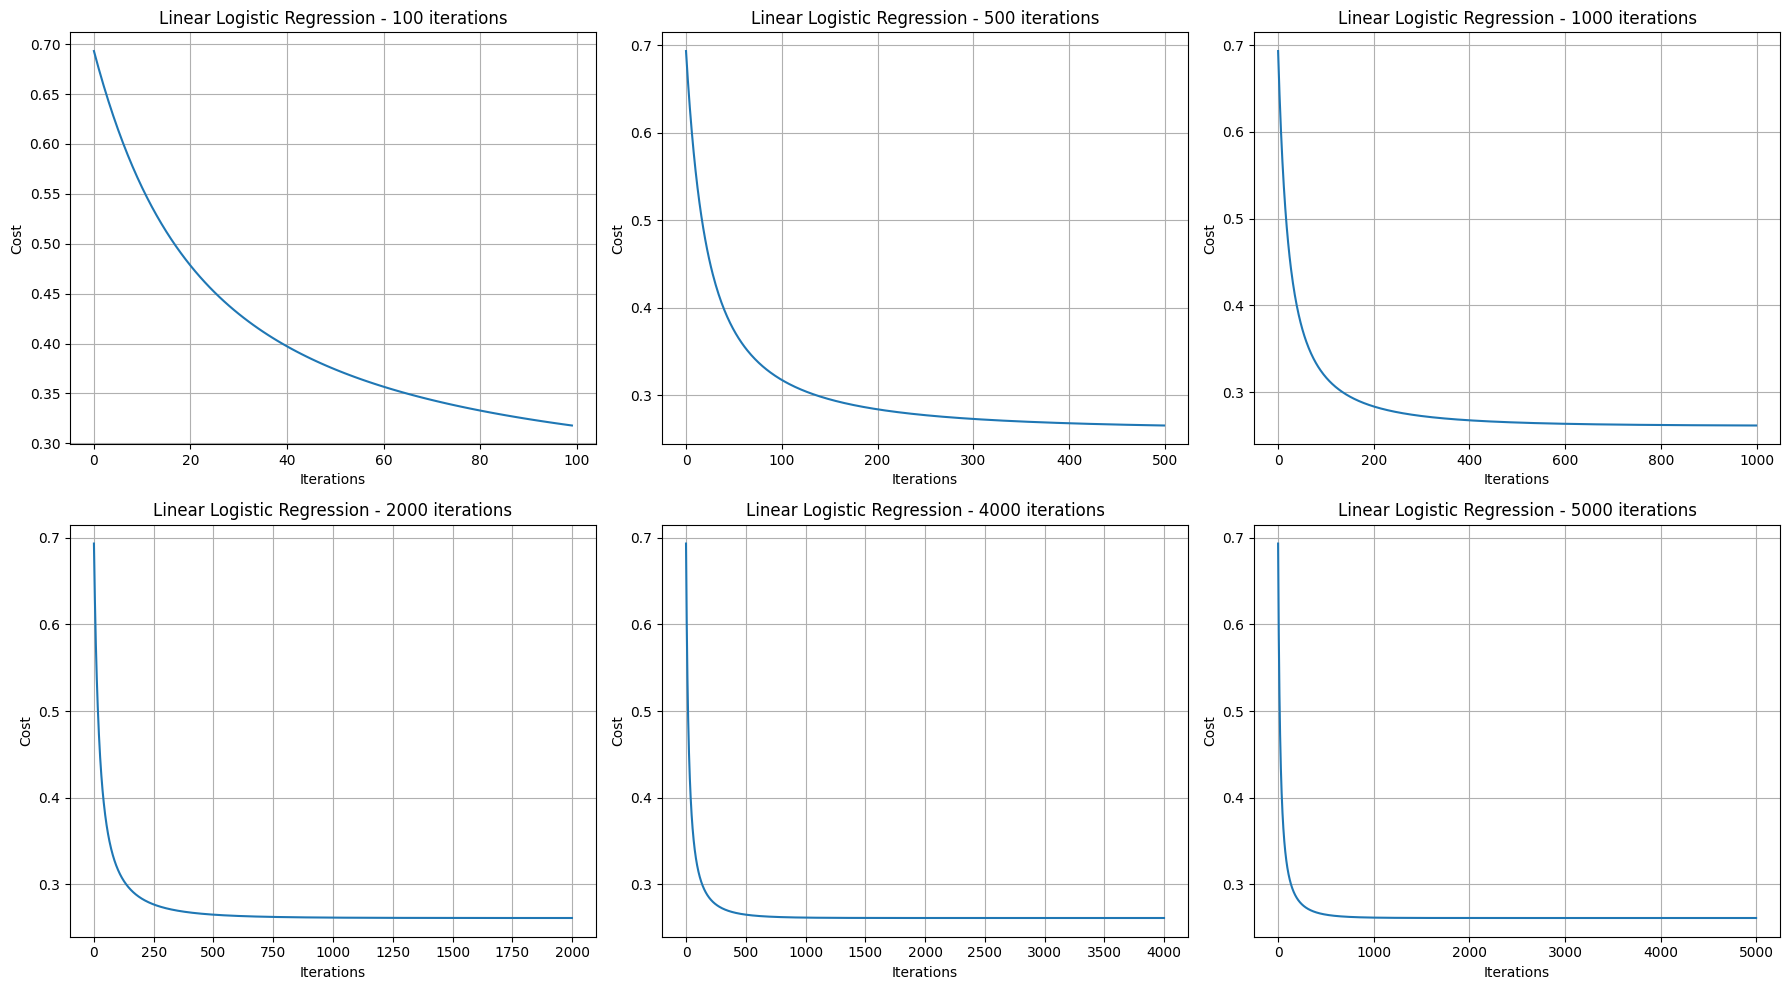

In [17]:
plt.figure(figsize=(18, 10))

for i,iterations in enumerate(iteration_counts):

    model_logreg = mlm.LogisticRegression(learning_rate=best_lr_lin, num_iterations=iterations)
    model_logreg.fit(X_train, y_train)

    plt.subplot(2, 3, i + 1)
    plt.plot(range(iterations), model_logreg.costs)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Linear Logistic Regression - {iterations} iterations')
    plt.grid(True)

plt.tight_layout()
plt.show()    


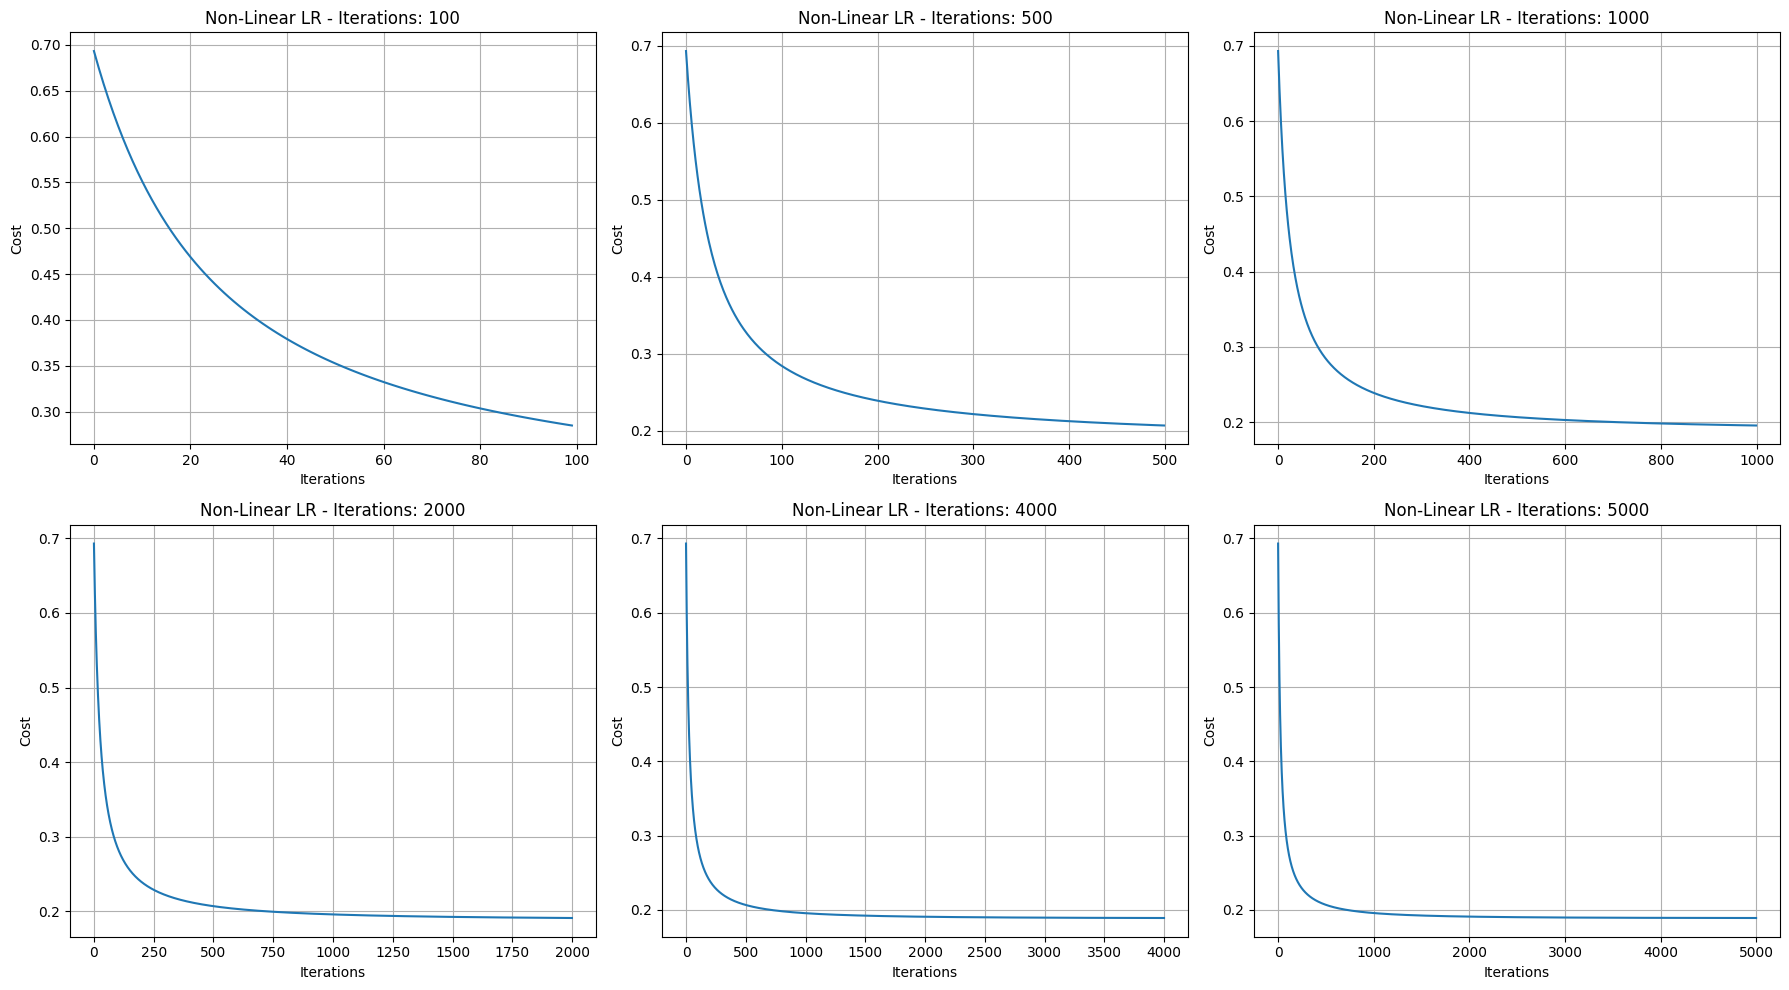

In [18]:
plt.figure(figsize=(18, 10))
for i, iterations in enumerate(iteration_counts):
    model_nlogreg = mlm.NonLinearLogisticRegression(degree=2, learning_rate=best_lr_nonlin, num_iterations=iterations)
    model_nlogreg.fit(X_train, y_train)

    plt.subplot(2, 3, i + 1)
    plt.plot(range(iterations), model_nlogreg.costs)
    plt.title(f'Non-Linear LR - Iterations: {iterations}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)

plt.tight_layout()
plt.show()

5. **(Non-Mandatory)** Repeat 20 times your experiments (i.e., using different seeds) with the decided learning rate and the number of iterations (step 2) using 20 different sub-datasets generated by your method from step 4. Report as a box-plot all accuracies (i.e., percentage of correct classifications) reported by each model in these 20 runs. Compare and discuss the two models. Are they qualitatively the same? Why?
---
- Performance Comparison:

    - Nonlinear Logistic Regression consistently outperforms the Linear model with:
        - Higher median accuracy (approximately 0.915 vs 0.883)
        - Higher minimum accuracy (approximately 0.895 vs 0.84)
        - Higher maximum accuracy (approximately 0.935 vs 0.925)

- Consistency:

    - The Nonlinear model shows less variability (smaller box height)
    - The Linear model has two outliers (at approximately 0.84 and 0.925), indicating less consistent performance across different data splits

- Distribution:

    - The entire box of the Nonlinear model is higher than most of the Linear model's distribution
    - There is minimal overlap between the performance ranges of the two models


The models are not qualitatively the same. The differences can be explained by:

- Model Complexity: The Nonlinear Logistic Regression can capture more complex relationships in the data that the Linear model cannot represent. This suggests the dataset contains nonlinear patterns that are important for classification.

- Generalization: The Nonlinear model's more consistent performance across different data splits (smaller variance) indicates better generalization to unseen data.

- Robustness: The absence of outliers in the Nonlinear model suggests it's more robust to variations in the training data compared to the Linear model.



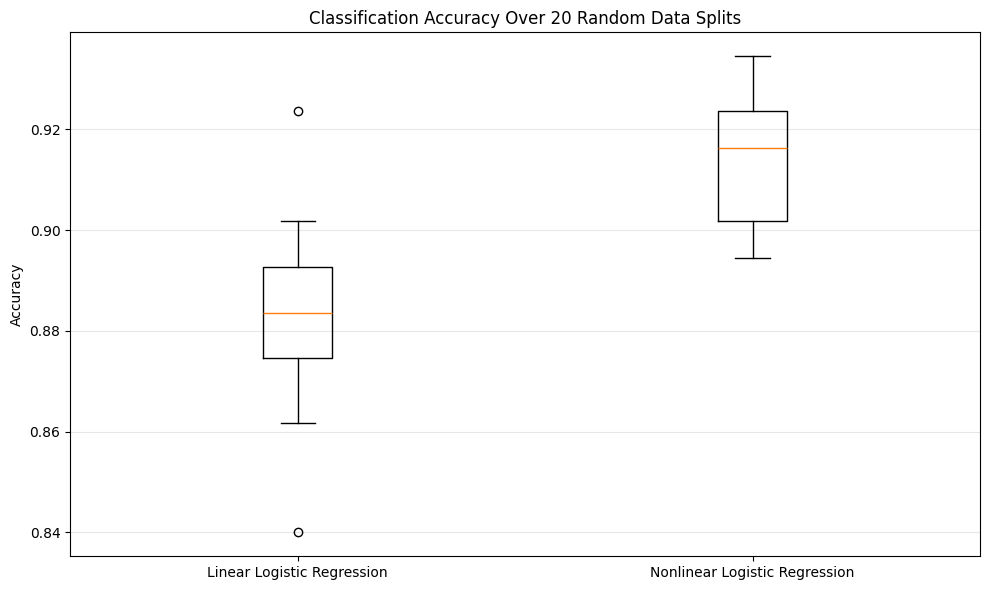

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import MachineLearningModel as mlm

data = np.genfromtxt('datasets/banknote_authentication.csv', delimiter=',', dtype=float, encoding='utf-8')
X = np.array(data[:, :2], dtype=float)
y = np.array(data[:, 2], dtype=float)

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

best_lr_lin = 0.1
num_iterations_lin = 1000

best_lr_nonlin = 0.1
num_iterations_nonlin = 1000
degree = 2

n_experiments = 20
base_seed = 856
linear_accuracies = np.zeros(n_experiments)
nonlinear_accuracies = np.zeros(n_experiments)

for i in range(n_experiments):
    np.random.seed(base_seed + i)
    
    indices = np.random.permutation(len(X_norm))
    split_point = int(0.8 * len(X_norm))
    

    X_train_indices = indices[:split_point]
    X_test_indices = indices[split_point:]
    
    X_train = X_norm[X_train_indices]
    X_test = X_norm[X_test_indices]
    y_train = y[X_train_indices]
    y_test = y[X_test_indices]
    
    linear_model = mlm.LogisticRegression(learning_rate=best_lr_lin, num_iterations=num_iterations_lin)
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    linear_accuracies[i] = np.mean(y_test == y_pred_linear)

    nonlinear_model = mlm.NonLinearLogisticRegression(degree=degree, learning_rate=best_lr_nonlin, num_iterations=num_iterations_nonlin)
    nonlinear_model.fit(X_train, y_train)
    y_pred_nonlinear = nonlinear_model.predict(X_test)
    nonlinear_accuracies[i] = np.mean(y_test == y_pred_nonlinear)

plt.figure(figsize=(10, 6))
box_data = [linear_accuracies, nonlinear_accuracies]
plt.boxplot(box_data, tick_labels=['Linear Logistic Regression', 'Nonlinear Logistic Regression'])
plt.title('Classification Accuracy Over 20 Random Data Splits')
plt.ylabel('Accuracy')
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

6. **(Non-Mandatory)** Now plot the decision boundary using a similar code to the one provided in class. You must plot the decision boundaries for the normalized data, use both models (LinearLogisticRegression and NonLinearLogisticRegression) and your choice of hyperparameters (step 3), totaling two figures. You must fit your model on the subdataset, but plot the validation dataset only in the figure.  The models that were fit are the ones to be used to create the decision boundary. Report also the accuracies for the two models.  Discuss your results (e.g., similarities, differences, etc) for accuracy and the decision boundary plots.
---
Linear Logistic Regression Accuracy: 0.8800 (88.00%)
Nonlinear Logistic Regression Accuracy: 0.9091 (90.91%)

Linear Logistic Regression:

- Creates a straight-line decision boundary
- Divides the feature space with a simple linear function
- Cannot adapt to more complex data patterns

Nonlinear Logistic Regression:

- Creates a curved decision boundary
- Able to capture more complex relationships in the data
- The boundary follows the natural separation between classes

Looking at the plots, several blue points fall into the red region in the linear model (and vice versa). The nonlinear model reduces these misclassifications by creating a more flexible boundary. The blue class points form a somewhat circular or curved pattern that the nonlinear model captures effectively.

Linear Logistic Regression Accuracy: 0.8800
Non-Linear Logistic Regression Accuracy: 0.9091


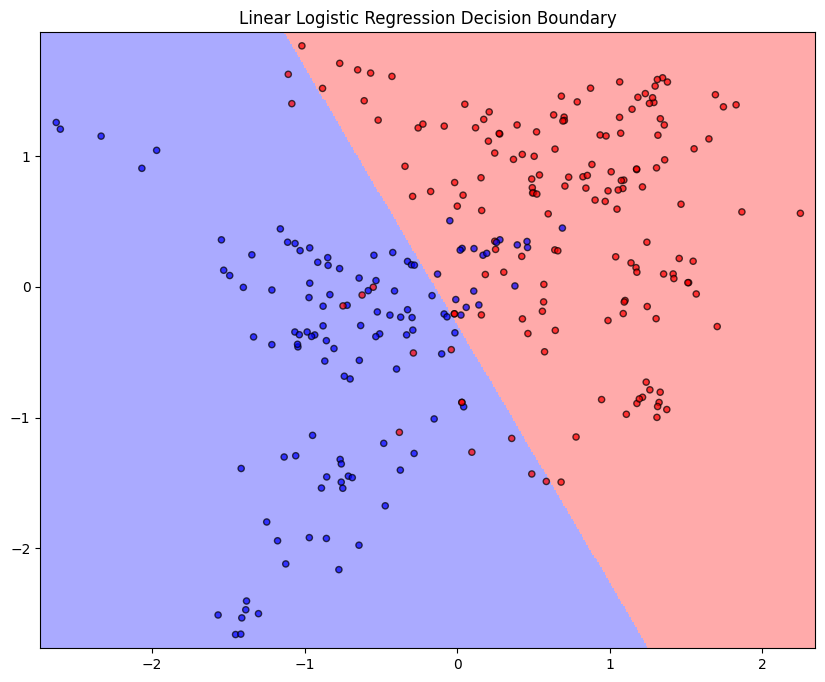

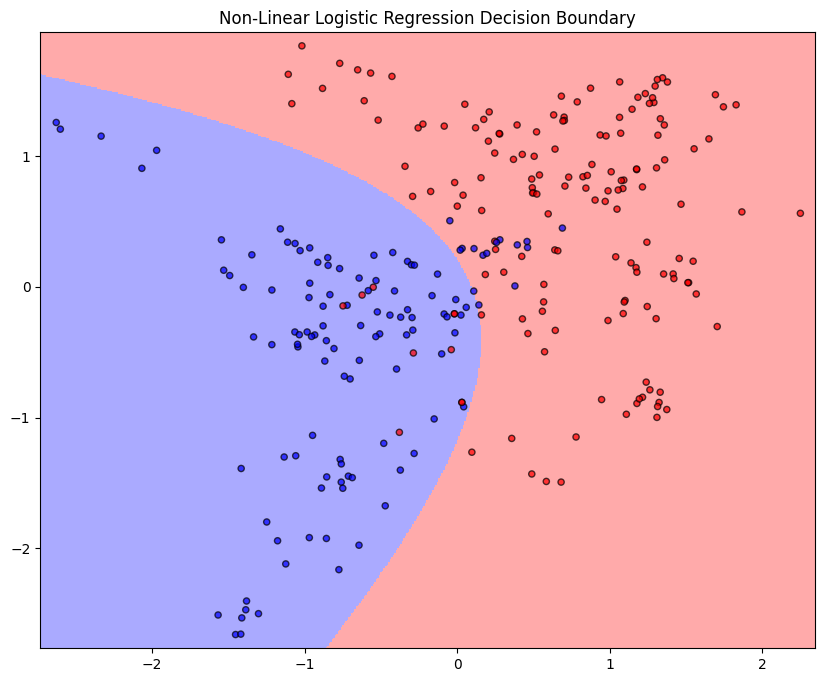

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import MachineLearningModel as mlm
from DecisionBoundary import plotDecisionBoundary

data = np.genfromtxt('datasets/banknote_authentication.csv', delimiter=',', dtype=float, encoding='utf-8')
X = np.array(data[:, :2], dtype=float)
y = np.array(data[:, 2], dtype=float)

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

np.random.seed(865)  
indices = np.random.permutation(len(X_norm))
split_point = int(0.8 * len(X_norm))
    
train_indices = indices[:split_point]
test_indices = indices[split_point:]
    
X_train = X_norm[train_indices]
X_test = X_norm[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

best_lr_lin = 0.1
iterations_lin = 1000

best_lr_nonlin = 0.1
iterations_nonlin = 1000
degree = 2

linear_model = mlm.LogisticRegression(learning_rate=best_lr_lin, num_iterations=iterations_lin)
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
linear_accuracy = np.mean(y_test == y_pred_linear)

nonlinear_model = mlm.NonLinearLogisticRegression(degree=degree, learning_rate=best_lr_nonlin, num_iterations=iterations_nonlin)
nonlinear_model.fit(X_train, y_train)
y_pred_nonlinear = nonlinear_model.predict(X_test)
nonlinear_accuracy = np.mean(y_test == y_pred_nonlinear)

print(f"Linear Logistic Regression Accuracy: {linear_accuracy:.4f}")
print(f"Non-Linear Logistic Regression Accuracy: {nonlinear_accuracy:.4f}")

plotDecisionBoundary(X_test[:, 0], X_test[:, 1], y_test, linear_model)
plt.title('Linear Logistic Regression Decision Boundary')
plt.show()

plotDecisionBoundary(X_test[:, 0], X_test[:, 1], y_test, nonlinear_model)
plt.title('Non-Linear Logistic Regression Decision Boundary')
plt.show()



## Lecture 4 - Model Selection and Regularization

### Guidelines for model implementation (Mandatory)

* Implement a class **ROCAnalysis** that calculates the metrics: TP-rate, FP-rate, precision, recall (i.e., same as tp-rate) and f-score.
* Implement a class **ForwardSelection** that implements the feature forward selection algorithm seen in class. This process must use 80% (i.e., fitting the data) of the data for training the models and 20% (i.e., predicting in unseen data) for testing. This method should optimize your problem regarding the TP-rate metric. You must use your implementation of the **ROCAnalysis** class.

For this exercise, you will use the *heart_disease_cleveland.csv* dataset. The dataset contains 13 numerical features, and the last feature is the target variable, which we have to predict. The value of 1 means the patient is suffering from heart disease, and 0 means the patient is normal.

### Using your implementations of ROCAnalysis and ForwardSelection (All Mandatory)

1. **(Mandatory)** Start by normalizing the data and separating a validation set with 20\% of the data randomly selected. The remaining 80\% will be called the sub-dataset.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import MachineLearningModel as mlm
import ROCAnalysis as roc
import ForwardSelection as fs

data = np.genfromtxt('datasets/heart_disease_cleveland.csv', delimiter=',', dtype=None, encoding='utf-8')
X = np.array(data[1:, :-1], dtype=float)
y = np.array(data[1:, -1], dtype=float)

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std


splitter = fs.ForwardSelection(X_norm, y, None)
X_train, X_test, y_train, y_test = splitter.create_split(X_norm, y)

2. **(Mandatory)** Use your implementation of forward selection to estimate a reasonable classification model. You must use your implementation of Logistic Regression in this assignment. The decision to make a reasonable number of iterations and learning rate is up to you but must be justified. Optimize the model selection to produce the best f-score. You must use the sub-dataset in your forward selection process. Report the features selected by this process and discuss your results. 
---
The feature selection process identified the following features in order of importance:

- Feature 1: cp
- Feature 2: age
- Feature 3: trestbps
- Feature 4: chol
- Feature 5: fbs
- Feature 6: restecg
- Feature 7: slope
- Feature 8: ca
- Feature 9: thalach
- Feature 10: thal

The selection of just five features from the original dataset demonstrates the efficiency of forward selection in reducing dimensionality while maintaining predictive power. The F-score optimization ensured a balance between correctly identifying positive cases and limiting false positives, which is particularly important in health-related classifications where both missed diagnoses and false alarms carry consequences.

In [22]:
model_logreg = mlm.LogisticRegression(0.1, 1000)

feature_selector = fs.ForwardSelection(X_train, y_train, model_logreg)

feature_selector.fit()

feature_names = np.array(data[0, :-1], dtype=str)

selected_feature_names = [feature_names[i] for i in feature_selector.selected_features]
for i, name in enumerate(selected_feature_names):
    print(f"Feature {i+1}: {name}")

Feature 1: cp
Feature 2: ﻿age
Feature 3: trestbps
Feature 4: chol
Feature 5: fbs
Feature 6: restecg
Feature 7: slope
Feature 8: ca
Feature 9: thalach
Feature 10: thal


3. **(Mandatory)** Report the performance of the best model in the validation set regarding all statistics available in your ROCAnalysis class. 
Was the process successful when compared to using all features?  
Discuss your results regarding these metrics and what you can conclude from this experiment.
---
Model with Selected Features:
- TP Rate (Recall): 0.8636
- FP Rate: 0.1282
- Precision: 0.7917
- F-score: 0.8261

Model with All Features:
- TP Rate (Recall): 0.8182
- FP Rate: 0.1282
- Precision: 0.7826
- F-score: 0.8000

The forward selection process proved successful when comparing the performance of the selected features model against using all features:

- Improved Recall: The model with selected features correctly identified 86.36% of positive cases compared to 81.82% with all features. This 4.54 percentage point improvement is significant in a medical context, as it means fewer missed positive cases.

- Equal False Positive Rate: Interestingly, both models produced identical FP rates (12.82%), suggesting that feature selection maintained the same level of specificity while improving sensitivity.

- Enhanced Precision: The selected features model achieved slightly higher precision (79.17% vs 78.26%), indicating that when it predicts a positive case, it's more likely to be correct.

- Superior F-score: The overall balance between precision and recall, measured by the F-score, showed clear improvement in the selected features model (0.8261 vs 0.8000).

In [23]:
y_pred_selected = feature_selector.predict(X_test)

all_features_model = mlm.LogisticRegression()
all_features_model.fit(X_train, y_train)

y_pred_all = all_features_model.predict(X_test)

selected_roc = roc.ROCAnalysis(y_pred_selected, y_test)
all_features_roc = roc.ROCAnalysis(y_pred_all, y_test)

print("Model with Selected Features:")
print(f"TP Rate (Recall): {selected_roc.tp_rate():.4f}")
print(f"FP Rate: {selected_roc.fp_rate():.4f}")
print(f"Precision: {selected_roc.precision():.4f}")
print(f"F-score: {selected_roc.f_score():.4f}")

print("\nModel with All Features:")
print(f"TP Rate (Recall): {all_features_roc.tp_rate():.4f}")
print(f"FP Rate: {all_features_roc.fp_rate():.4f}")
print(f"Precision: {all_features_roc.precision():.4f}")
print(f"F-score: {all_features_roc.f_score():.4f}")


Model with Selected Features:
TP Rate (Recall): 0.8636
FP Rate: 0.1282
Precision: 0.7917
F-score: 0.8261

Model with All Features:
TP Rate (Recall): 0.8182
FP Rate: 0.1282
Precision: 0.7826
F-score: 0.8000


## Lecture 5 - Neural Networks

In this exercise you are allowed to use the scikit-learn package.

**(Mandatory)** First, load the digits dataset using *sklearn.datasets.load_digits*. Split the data into training and test sets (e.g., 80/20 split using train_test_split). Finally, plot 16 random images from the dataset in a 4×4 grid using matplotlib, with their labels displayed.

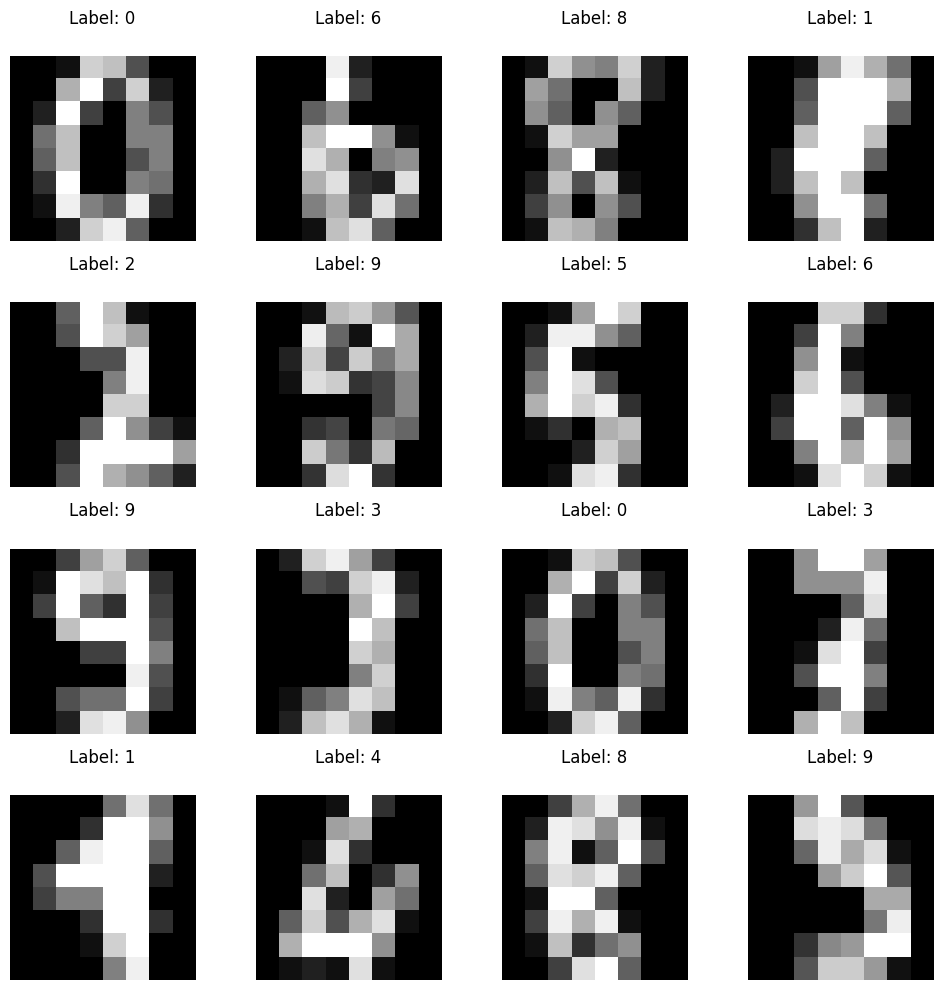

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=865)
images = digits.images

np.random.seed(865)
random_indices = np.random.randint(0, len(digits.images), 16)

fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.matshow(images[random_indices[i]], cmap='gray')

    ax.set_title(f"Label: {digits.target[random_indices[i]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

**(Mandatory)** Use MLPClassifier from *sklearn.neural_network*. 

Train an MLP on the training set and evaluate on the test set.

Then, use cross-validation (e.g., with GridSearchCV or cross_val_score) to explore:

* Number and size of hidden layers

* Activation functions: relu, tanh, logistic

* Learning rate strategies: constant, adaptive

* L2 regularization (alpha)

* Solvers: adam, sgd


Compare different configurations and choose the best-performing model.

Report cross-validation scores and final test accuracy.

--------------------------------------------------------------------

To find the best configuration, I performed cross-validation using GridSearchCV, exploring different numbers and sizes of hidden layers, activation functions (relu, tanh, logistic), learning rate strategies (constant, adaptive), L2 regularization strengths (alpha), and solvers (adam, sgd).

After running the grid search, the best parameters found were:

Activation function: relu
Alpha (L2 regularization): 0.0001
Hidden layers: (100, 50)
Learning rate: constant
Solver: adam
The best cross-validation score achieved was 0.9756, and the final test accuracy of the best model was 0.9694.

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(max_iter=1000, random_state=865)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9694


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=865), param_grid, n_jobs=-1, cv=3)

grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {best_accuracy:.4f}")

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best Cross-Validation Score: 0.9756
Best Model Accuracy: 0.9694


**(Non-mandatory)**  Plot the confusion matrix for your best model on the test set.

Which digits are often confused?

---
The confusion matrix shows that most digits are classified correctly, as the diagonal values are high.

However, there are a few confusions:

- 9 → 5: 2 times
- 8 → 5: 1 times
- 5 → 4: 1 times
- 9 → 8: 1 times
- 1 → 4: 1 times
- 8 → 9: 1 times
- 3 → 5: 1 times
- 3 → 2: 1 times
- 9 → 3: 1 times

Overall, the model performs very well, but digits like 3, 8, and 9 are occasionally confused with similar-looking digits, which is common in handwritten digit classification.


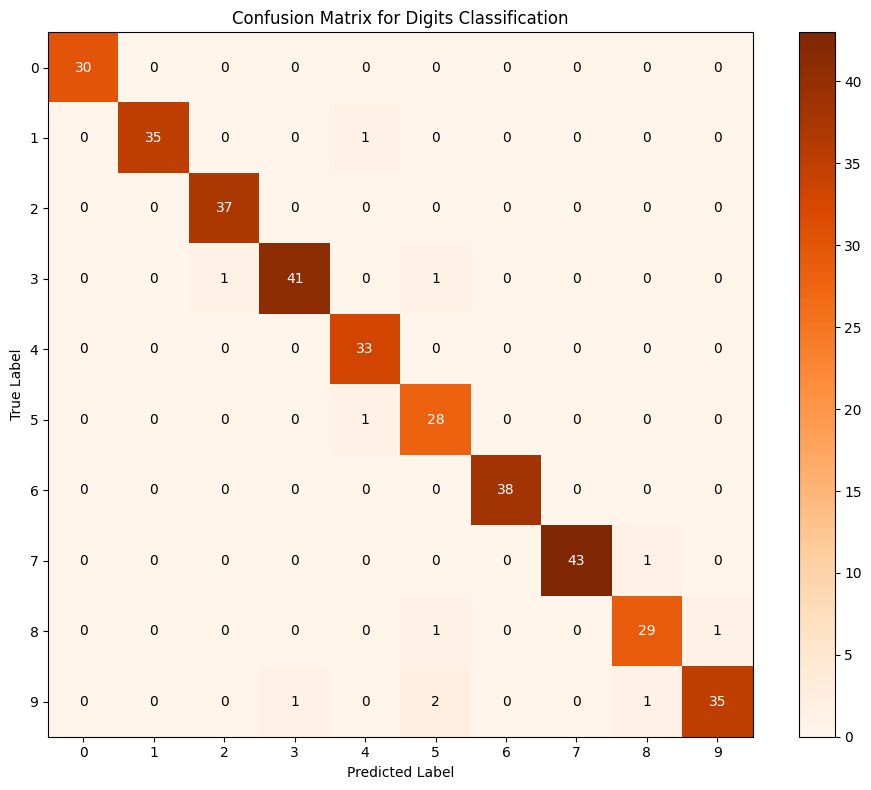

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')
plt.colorbar()
plt.title('Confusion Matrix for Digits Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



**(Non-Mandatory)** Plot at least 10 misclassified images with predicted and true labels.

Try to identify patterns in the errors (e.g., similar-looking digits).

Are the misclassifications understandable for humans? Why or why not?

---
I plotted 10 misclassified images (from 11 total) from the test set, showing both the true and predicted labels above each digit. By looking at the images, I noticed some patterns in the errors:

- Many of the misclassifications involve digits that look visually similar, especially when handwritten. For example, the digit 8 is often confused with 2 and 3, and 3 is sometimes predicted as 2 or 5.
- The digit 9 was misclassified as 5, and 7 was misclassified as 8. These mistakes are understandable because, in some handwritten styles, these digits can look quite alike.
- There is also a case where 1 was predicted as 5, which could be due to the way the digit was written.

Overall, most of the misclassifications are understandable for humans, as the digits in these images are ambiguous or written in a way that makes them resemble other digits. This shows that even for humans, these cases could be challenging to classify correctly.

Total misclassified examples: 11


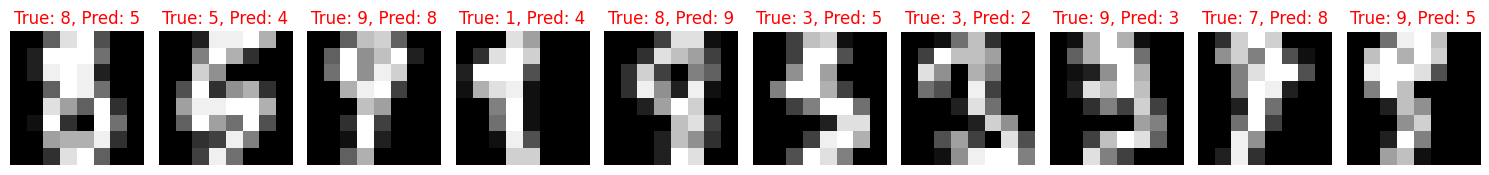

In [28]:
import numpy as np
import matplotlib.pyplot as plt

misclassified_indices = np.where(y_test != y_pred)[0]
print(f"Total misclassified examples: {len(misclassified_indices)}")

num_to_display = min(10, len(misclassified_indices))
selected_indices = misclassified_indices[:num_to_display]

test_images = X_test.reshape(-1, 8, 8)


fig, axes = plt.subplots(1, 10, figsize=(15, 6))

for i, idx in enumerate(selected_indices):
    ax = axes[i]
    ax.imshow(test_images[idx], cmap='gray')
    ax.set_title(f"True: {int(y_test[idx])}, Pred: {int(y_pred[idx])}", 
                 color='red')
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

**(Non-Mandatory)** 

Plot training/validation accuracy or loss over epochs if you're capturing it (using verbose=True or tracking manually).

How quickly does your model reach a stable accuracy or loss?

Is the training accuracy much higher than the validation accuracy?

Does the loss decrease on training but increase on validation?

---
The model reaches stable performance quite rapidly, within approximately 25-30 epochs. Both the accuracy and loss curves show dramatic improvement in the early stages of training. After epoch 50, the changes become minimal, indicating the model has largely converged.

#### Training vs Validation Accuracy

There is a noticeable gap between training and validation accuracy:

- Training accuracy (blue line) reaches almost perfect classification (~100%)
- Validation accuracy (orange line) plateaus around 96-97%

This gap indicates some degree of overfitting, though it's relatively modest for a neural network model. The validation accuracy remains high and stable, suggesting the model still generalizes well to unseen data.

#### Loss Behavior

The loss plot shows:

- Training loss (blue) continuously decreases toward zero
- Validation loss (orange) initially decreases rapidly but stabilizes at a value slightly higher than training loss

Importantly, the validation loss doesn't increase after reaching its minimum - it plateaus instead. This suggests that while there is some overfitting (as expected), it's not severe enough to cause the validation performance to deteriorate over time.

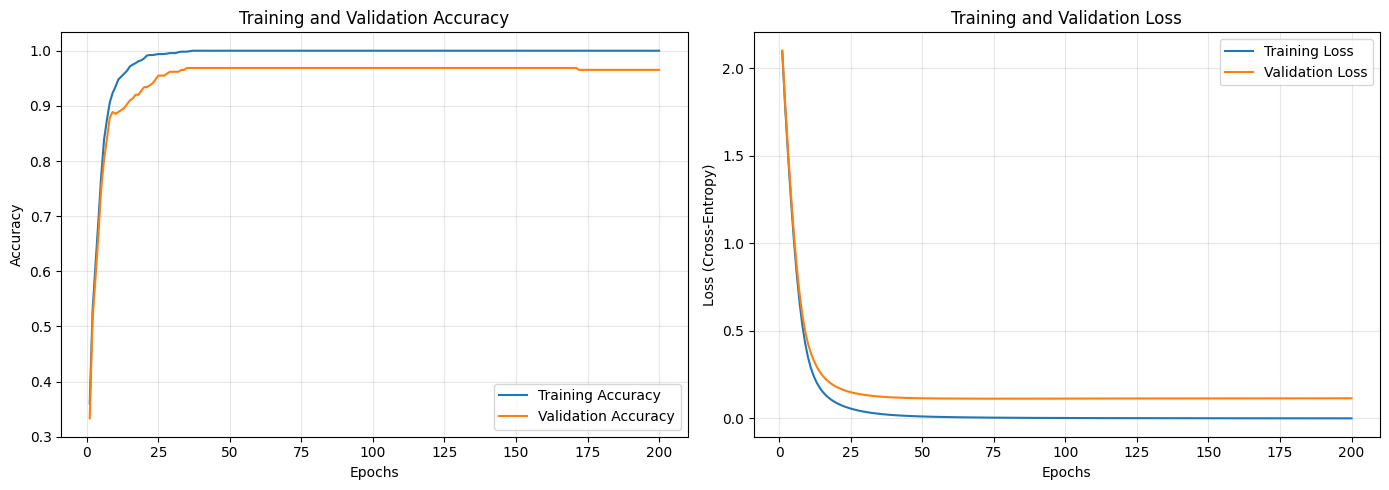

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split

X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=865
)

best_mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='constant',
    max_iter=1, 
    warm_start=True,  
    random_state=865
)

max_epochs = 200
epochs = []
train_loss = []
train_acc = []
val_loss = []
val_acc = []

def to_onehot(y, num_classes=10):
    onehot = np.zeros((len(y), num_classes))
    for i, val in enumerate(y):
        onehot[i, val] = 1
    return onehot

y_train_onehot = to_onehot(y_train_split)
y_val_onehot = to_onehot(y_val)

classes = np.unique(y_train_split)
for i in range(max_epochs):
    if i == 0:
        best_mlp.partial_fit(X_train_split, y_train_split, classes=classes)
    else:
        best_mlp.partial_fit(X_train_split, y_train_split)
    
  
    train_pred = best_mlp.predict(X_train_split)
    val_pred = best_mlp.predict(X_val)
    

    train_proba = best_mlp.predict_proba(X_train_split)
    val_proba = best_mlp.predict_proba(X_val)
    

    epochs.append(i+1)
    train_loss.append(log_loss(y_train_onehot, train_proba))
    train_acc.append(accuracy_score(y_train_split, train_pred))
    val_loss.append(log_loss(y_val_onehot, val_proba))
    val_acc.append(accuracy_score(y_val, val_pred))
    

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(epochs, train_acc, label='Training Accuracy')
ax1.plot(epochs, val_acc, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(epochs, train_loss, label='Training Loss')
ax2.plot(epochs, val_loss, label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss (Cross-Entropy)')
ax2.set_title('Training and Validation Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()